In [1]:
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_train.csv').values
df

array([[ 73,  80,  75, 152],
       [ 93,  88,  93, 185],
       [ 89,  91,  90, 180],
       [ 96,  98, 100, 196],
       [ 73,  66,  70, 142],
       [ 53,  46,  55, 101],
       [ 69,  74,  77, 149],
       [ 47,  56,  60, 115],
       [ 87,  79,  90, 175],
       [ 79,  70,  88, 164],
       [ 69,  70,  73, 141],
       [ 70,  65,  74, 141],
       [ 93,  95,  91, 184],
       [ 79,  80,  73, 152],
       [ 70,  73,  78, 148],
       [ 93,  89,  96, 192],
       [ 78,  75,  68, 147],
       [ 81,  90,  93, 183],
       [ 88,  92,  86, 177],
       [ 78,  83,  77, 159],
       [ 82,  86,  90, 177],
       [ 86,  82,  89, 175],
       [ 78,  83,  85, 175]])

In [3]:
x1 = df[:,0]
x2 = df[:,1]
x3 = df[:,2]
X_train = df[:,:3]
y_train = df[:,3]
print(X_train.shape, y_train.shape)

(23, 3) (23,)


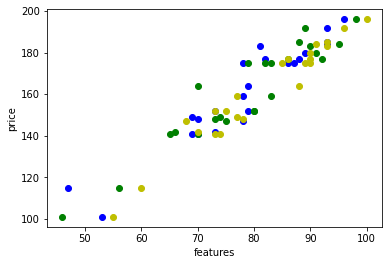

In [4]:
%matplotlib inline
plt.xlabel('features')
plt.ylabel('price')
plt.scatter(x1,y_train,c='b')
plt.scatter(x2,y_train,c='g')
plt.scatter(x3,y_train,c='y')
plt.show()

In [5]:
X_train = np.c_[np.ones((len(X_train),1)),X_train]

In [6]:
print(X_train.shape, y_train.shape)


(23, 4) (23,)


In [7]:
def predict(x,theta):
    return np.dot(x, theta)

In [8]:
def error(x,y,theta):
    y_pre = predict(x,theta)
    return 1/len(x)*(y-y_pre)**2

In [9]:
def compute_cost(x,y,theta,lambdaa):
    errors = error(x,y,theta)
    return 1/(2*m)*np.dot(errors.T, errors) + lambdaa/2 *np.sum(theta.T@theta)

In [10]:
def gradient_descent(x,y,theta,learning_rate,num_iter,m,lambdaa):  
    cost_list = []
    theta_list = []
    for i in range(num_iter):
        y_pre = predict(x,theta)
        errors = error(x,y,theta)
        cost = compute_cost(x,y,theta,lambdaa)
        cost_list.append(cost)
        theta-= learning_rate*np.dot(np.dot(x, theta) - y, x) / m + lambdaa*theta
        theta_list.append(theta)
    return theta_list, cost_list

In [11]:
learning_rate = 0.0001
m = len(y_train)  
theta = np.random.rand(4)  #initializing theta with some random values
num_iter = 200
lambdaa = .00
#print(error(x_train, y_train,theta))


In [12]:
theta_list, cost_list = gradient_descent(X_train,y_train,theta,learning_rate,num_iter,m,lambdaa)
print(np.array(cost_list))

[78.03499086 64.06189406 48.36610351 40.39890843 30.28197251 25.849602
 19.18221088 16.82144415 12.3127248  11.15742286  8.02002391  7.55787825
  5.30781526  5.23626939  3.57308514  3.71396924  2.44881497  2.69774484
  1.71009414  2.00645902  1.21795954  1.52710775  0.88571272  1.18836771
  0.65865009  0.94461557  0.50181331  0.76622502  0.39254713  0.63363885
  0.31594863  0.53371986  0.26206242  0.45748411  0.22413545  0.39867757
  0.19751915  0.35287125  0.17896997  0.31687775  0.16619737  0.28836919
  0.15756724  0.26562289  0.15190422  0.24734906  0.14835769  0.23257218
  0.14630954  0.22054778  0.14530968  0.21070325  0.14503038  0.20259517
  0.14523354  0.19587795  0.14574691  0.19028076  0.14644679  0.1855902
  0.14724523  0.1816373   0.14808066  0.17828758  0.14891085  0.17543352
  0.1497077   0.17298877  0.15045341  0.17088359  0.15113757  0.16906148
  0.15175503  0.16747638  0.15230433  0.1660906   0.15278651  0.16487315
  0.15320429  0.16379844  0.15356139  0.16284524  0.15

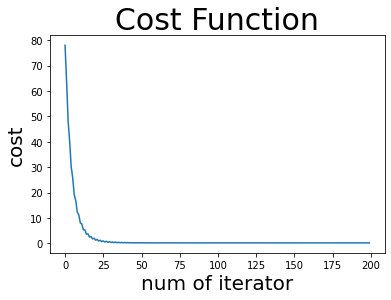

In [13]:
plt.title('Cost Function', size = 30)
plt.xlabel('num of iterator', size = 20)
plt.ylabel('cost', size = 20)
plt.plot(cost_list)
plt.show()

Ta suy ra theta

In [14]:
new_theta = theta_list[-1]
print(new_theta.shape)

(4,)


# Test

In [15]:
df_test = pd.read_csv('data_test.csv').values

In [16]:
X_test = df_test[:,:3]
y_test = df_test[:,3]
X_test = np.c_[np.ones((len(X_test),1)),X_test]

In [17]:
Y_predict_from_test = predict(X_test,new_theta)

In [18]:
print("ta du doan diem tu model",Y_predict_from_test) 
print("diem thuc te", y_test)

ta du doan diem tu model [153.92552971 190.42477604]
diem thuc te [149 192]
